In [166]:
import numpy as np
import matplotlib.pyplot as plt

## Modelo de Michaelis–Menten kinetics

$$ f(x, \theta_0, \theta_1) = y = \dfrac{\theta_0  x}{(\theta_1 + x)} + \epsilon $$

In [167]:
#El modelo de Michaelis–Menten kinetics

def y_hat(theta_0, theta_1, x):
    p = (theta_0*x)/(theta_1 + x) + 0.01
    return(p)


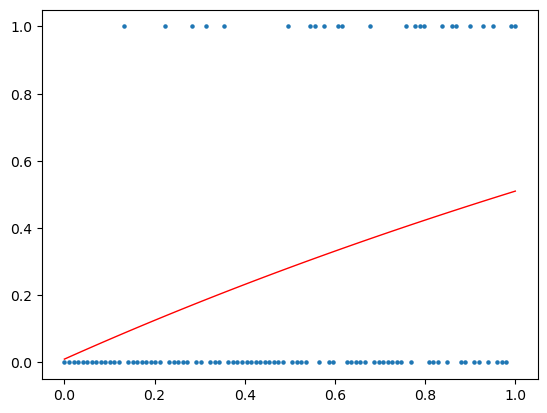

In [168]:
# Simulemos 100 datos para nuestra regression logistica
n = 100

# Definamos los parametros theta_0 "intercepto' y theta_1 "pendiente"
theta_0, theta_1 = [3, 5]

# Simular los datos x1, y
# Grilla de valores para nuestra covariable
x1 = np.linspace(0, 1, n)

# Esta funcion describe la probabilidad (p) que la observacion x sea 0 o 1.
y = np.random.binomial(1, y_hat(theta_0, theta_1, x1), n)

# Graficamos
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(3, 5, x1), color='red', linewidth = 1)

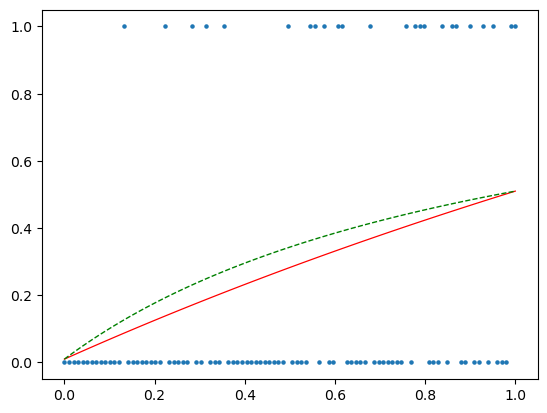

In [169]:
# Ahora vamos a realizar un SGD para estimar los parametros theta.
# Inicializar parametros
t0 = 1
t1 = 1

plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(3, 5, x1), color='red', linewidth = .9)
# La curva en verde es la curva estimada con los parametros inicializados
plt.plot(x1, y_hat(t0, t1, x1), color= 'green', linewidth= 1, linestyle= '--')

## Loss function

$$ \mathcal{L} = -\dfrac{1}{n} \sum \left(Y \log(\hat{y}) + (1-Y) \log(1 - \hat{y}) \right)$$

In [170]:
# Definimos nuestra Loss function
def loss_fun(Y, X, t0, t1):
    loss = -1/n * np.sum(Y * np.log(y_hat(t0, t1, X)) + (1 - Y) * np.log(1 - y_hat(t0, t1, X)))
    return(loss)

# Obtenemos la cantidad error que cometemos
loss_ini = loss_fun(y, x1, t0, t1)
print("LOSS inicial:", loss_ini)

LOSS inicial: 0.5152239027805166


In [171]:
# Llevamos regsitro del error y los parametros
error = []
error.append(loss_ini)

t0_hat = []
t1_hat = []

t0_hat.append(t0)
t1_hat.append(t1)

## Gradient Descent
$$\nabla_{\theta_0} \mathcal{L} = \sum \hat{y} - y $$

$$\nabla_{\theta_1} \mathcal{L} = \sum (\hat{y} - y) x $$

In [172]:
# Gradient descent
def delta_theta_0(y, x1, t0, t1):
    delta_0 = np.sum((y_hat(t0, t1, x1) - y))
    return(delta_0)

def delta_theta_1(y, x1, t0, t1):
    delta_1 = np.sum((y_hat(t0, t1, x1) - y) * x1)
    return(delta_1)

# Step size o learnig rate
rho = .002

In [173]:
t0 -= rho*delta_theta_0(y, x1, t0, t1)
t1 -= rho*delta_theta_1(y, x1, t0, t1)

t0_hat.append(t0)
t1_hat.append(t1)

loss = loss_fun(y, x1, t0, t1)
error.append(loss)


print(t0_hat, t1_hat, error, sep='\n')


[1, 0.9847444043610293]
[1, 0.9925032302617409]
[0.5152239027805166, 0.5140579919425917]


Text(0.5, 1.0, 'Loss en funcion del Epoch')

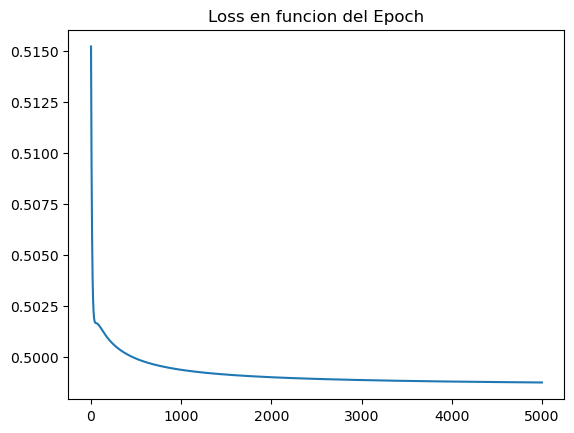

In [174]:
epoch = 5000

for i in range(epoch):
    t0 -= rho * delta_theta_0(y, x1, t0, t1)
    t1 -= rho * delta_theta_1(y, x1, t0, t1)
    
    t0_hat.append(t0)
    t1_hat.append(t1)
    
    loss = loss_fun(y, x1, t0, t1)
    error.append(loss)
plt.plot(error)
plt.title("Loss en funcion del Epoch")

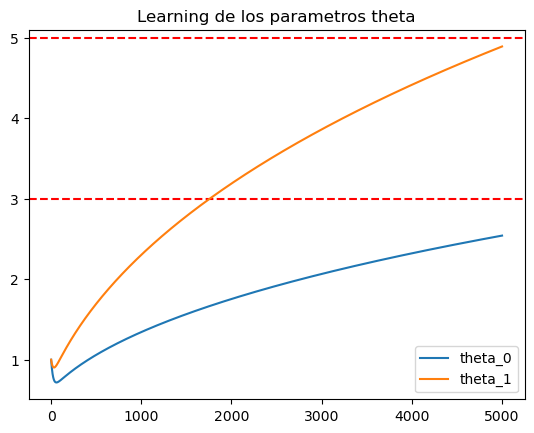

In [175]:
plt.plot(t0_hat, label = 'theta_0')
plt.axhline(y = theta_0, color='red', linestyle='--')

plt.plot(t1_hat, label = 'theta_1')
plt.axhline(y = theta_1, color='red', linestyle='--')

plt.title("Learning de los parametros theta")
plt.legend()

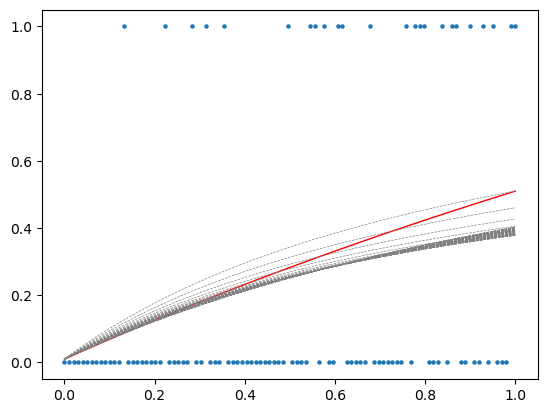

In [176]:
plt.scatter(x1, y, s= 5)
plt.plot(x1, y_hat(3, 5, x1), color='red', linewidth = 1)

for i in range(50):
    plt.plot(x1, y_hat(t0_hat[10*i], t1_hat[10*i], x1), color= 'gray', linewidth= .5, linestyle= '--')

Text(0, 0.5, 'theta_1')

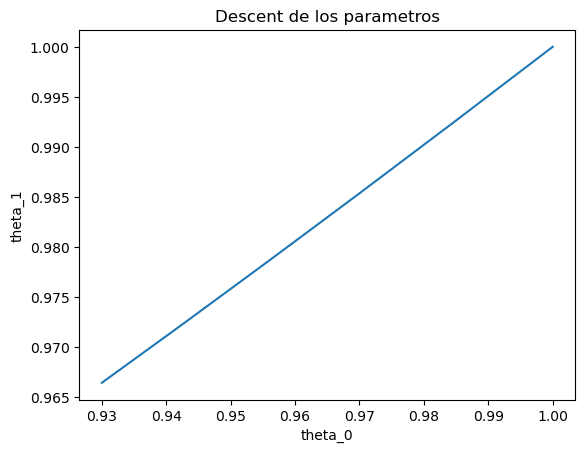

In [177]:
plt.plot(t0_hat[0:6], t1_hat[0:6])

plt.title("Descent de los parametros")
plt.xlabel('theta_0')
plt.ylabel('theta_1')